# Using root_numpy To Convert A Root TTree to a Pandas Dataframe, then Mimicking TTree::Draw Commands

In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline

# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import pandas as pd

# This is the tool this ipynb is demonstrating
# There are other root_numpy functions that are useful
# but this is the one I personally use most often
# Originally copied from some ipynb Taritree showed me
# during the "omfg noise is everywhere" fiasco
from root_numpy import root2array

### In this section I do some simple commands to find a TFile I have stored so I can demonstrate root_numpy functionality. If you already know what file (path and name) and TTree name within the file, this is unnecessary.

In [2]:
# Uhh I know I have some analysis module output files here that have ttrees in them
filedir = '/Users/davidkaleko/larlite/UserDev/KalekoAna/CCInclusive/mac'

In [3]:
# Protip: execute command line from ipynb with "!", get
# ipynb variable values with "$"
!ls $filedir | grep MCTruth | grep ".root"

TestMCTruth_ana_out.root


In [4]:
myfile = filedir + '/TestMCTruth_ana_out.root'
# Gonna make a "TFile" here just to see the name of the ttree,
# but if you know the ttree name apriori you don't need TFile at all
f = TFile(myfile,"READ")
print [mykey.GetName() for mykey in f.GetListOfKeys()]
f.Close()

['h_mup', 'h_mup_diff', 'tree']


### Here we go. The following command takes the TTree and converts it into a Pandas dataframe

In [5]:
# OK I have a ttree named "tree" in this file... classic.
# No idea what's in the tree. Let's read it into a pandas dataframe.
df = pd.DataFrame( root2array( myfile, 'tree' ) )

### The data frame has the same number of rows the TTree has entries
### Note root2array has other optional arguments like total # of entries to read in (If you have a huge ttree, maybe only read in the first few entries to writeyour code, then go back and read in all of them to run the final version.)
## root2array documentation is [here](https://rootpy.github.io/root_numpy/reference/generated/root_numpy.root2array.html)

### The following are a few basic dataframe commands just to explore what is in the dataframe (can't remember if someone else is covering this in this tutorial)

In [6]:
# IDK what the TTree branches (now dataframe columns) are...
# Let's see
print df.columns.values

['true_mu_TotE' 'true_p_TotE' 'true_n_TotE' 'true_p_p' 'thetap' 'true_mu_p'
 'thetamu' 'absphidiff_minuspi' 'reco_mu_p' 'premnant' 'ptremnant'
 'plane_Z_anglediff' 'true_nu_E' 'Eremnant' 'Eccqe_truemumom'
 'Eccqe_recomumom' 'true_p_KE' 'reco_mu_TotE' 'reco_nu_E_4momentum'
 'reco_mu_TotE_quadratic' 'reco_mu_p_quadratic' 'thetamup' 'bindinoE'
 'bindinop' 'genieCCQE' 'genieMomDiff']


In [7]:
# You can also print the first few rows to see some values like this:
df.head()

,true_mu_TotE,true_p_TotE,true_n_TotE,true_p_p,thetap,true_mu_p,thetamu,absphidiff_minuspi,reco_mu_p,premnant,...,true_p_KE,reco_mu_TotE,reco_nu_E_4momentum,reco_mu_TotE_quadratic,reco_mu_p_quadratic,thetamup,bindinoE,bindinop,genieCCQE,genieMomDiff
0,0.517815,1.232229,0.975925,0.798772,0.674103,0.506920,0.740568,0.084191,0.738974,0.263907,...,0.293957,0.746489,0.772356,0.597387,998.999994,1.414670,0.0295,0.044797,True,2.183961e-17
1,0.655063,1.109010,0.958533,0.591229,0.757121,0.646485,0.562688,0.109020,0.761208,0.189743,...,0.170738,0.768506,0.809001,0.567838,998.999994,1.319809,0.0360,0.065046,True,4.045164e-17
2,0.276511,1.255998,0.940708,0.834973,0.193012,0.255528,2.402028,0.095263,0.237640,0.046362,...,0.317726,0.260070,0.593420,0.194675,998.999994,2.595040,0.0295,0.043750,True,2.490481e-17
3,1.533694,1.208631,0.939908,0.761865,0.953103,1.530050,0.437726,-0.019300,1.465234,0.025392,...,0.270359,1.469038,1.803354,1.011219,998.999994,1.390829,0.0295,0.045983,True,2.297707e-16
4,0.541815,0.961535,0.942118,0.210235,0.986188,0.531412,0.669095,-0.097137,0.282650,0.069304,...,0.023263,0.301752,0.552278,-0.036237,998.999994,1.655283,0.0295,0.108825,True,2.366003e-17


In [8]:
# And you can get a summary of the dataframe info like this:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18490 entries, 0 to 18489
Data columns (total 26 columns):
true_mu_TotE              18490 non-null float64
true_p_TotE               18490 non-null float64
true_n_TotE               18490 non-null float64
true_p_p                  18490 non-null float64
thetap                    18490 non-null float64
true_mu_p                 18490 non-null float64
thetamu                   18490 non-null float64
absphidiff_minuspi        18490 non-null float64
reco_mu_p                 18490 non-null float64
premnant                  18490 non-null float64
ptremnant                 18490 non-null float64
plane_Z_anglediff         18490 non-null float64
true_nu_E                 18490 non-null float64
Eremnant                  18490 non-null float64
Eccqe_truemumom           18490 non-null float64
Eccqe_recomumom           18490 non-null float64
true_p_KE                 18490 non-null float64
reco_mu_TotE              18490 non-null float64
reco_nu_E

### Now let's show some equivalent of TTree->Draw commands
### Let's say you want to do TTree->Draw("true_mu_TotE")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112316110>]], dtype=object)

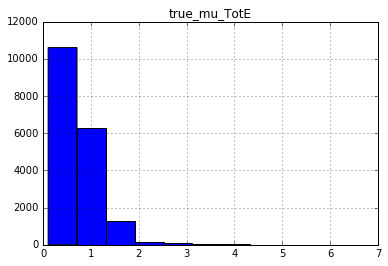

In [9]:
df.hist("true_mu_TotE")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11529aa10>]], dtype=object)

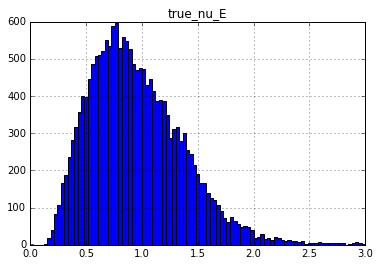

In [10]:
# Ok let's provide some reasonable binning
df.hist("true_nu_E",bins=np.linspace(0,3,100))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11544e790>]], dtype=object)

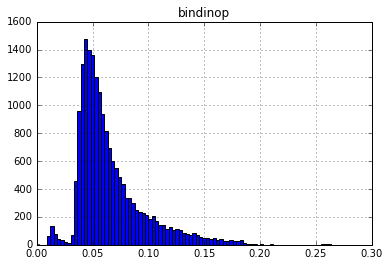

In [11]:
# Let's take a quick look at another variable
df.hist("bindinop",bins=np.linspace(0,0.3,100))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11558ae90>]], dtype=object)

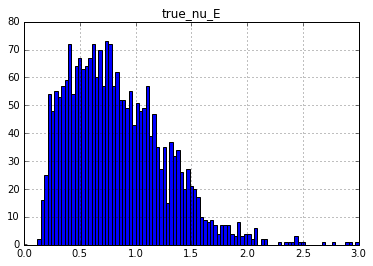

In [12]:
# Now let's do the following TTree->Draw command:
# TTree->Draw("true_nu_E","bindinop > 0.10","")
# Which is, "draw my true_nu_E variable only for entries where bindinop > 0.1"
df.query('bindinop > 0.10').hist('true_nu_E',bins=np.linspace(0,3,100))

### Now let's do the following TTree.Draw:
### TTree->Draw("true_nu_E:bindinop>>myhist(100,0,0.1,100,0,3)","","COLZ")
#### This gets bindinop on the x axis, true_nu_E on the y-axis. It places no cuts (though you can easily place them with the query command above), and it sets the color scheme to "COLZ"

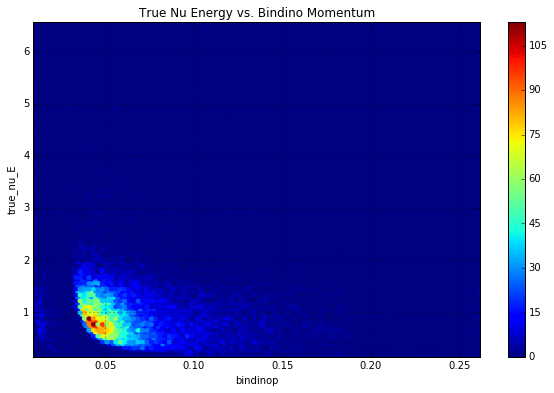

In [13]:
# As far as I can tell, there isn't a good dataframe.Draw command to do exactly
# this as root does it, but you can get close... annoyingly this uses hexagonal shaped bins
df.plot(x='bindinop',y='true_nu_E',
        kind='hexbin',
        figsize=[10,6],
        title='True Nu Energy vs. Bindino Momentum',
        colormap='jet',
        gridsize=100)

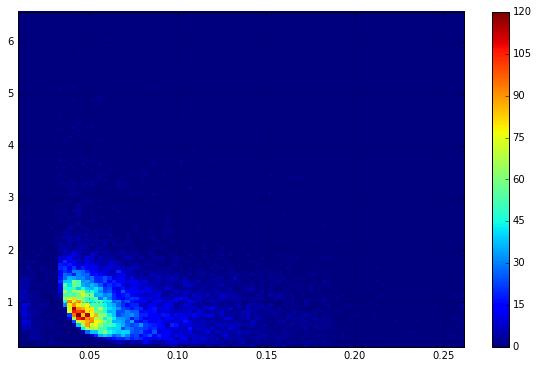

In [14]:
# If you want to exactly duplicate the ROOT plot you can do the following,
# which reads dataframe values into a numpy array and then uses matplotlib 
# to make the plot, rather than just making the plot with a dataframe.Draw command
myx = df['bindinop']
myy = df['true_nu_E']
plt.figure(figsize=(10,6))
plt.grid(True) # ALWAYS GRID TRUE
poop = plt.hist2d(x=myx,y=myy,bins=100)#[np.linspace(0,0.3,100),np.linspace(0,3,100)])
plt.colorbar()